<a href="https://colab.research.google.com/github/BarkhaAnjum/linear-regression/blob/main/Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

from google.colab import files
uploaded = files.upload()


Saving housing.csv to housing.csv


In [6]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [9]:
df = pd.read_csv("housing.csv")
print("Shape:", df.shape)
print(df.head())

Shape: (5000, 7)
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA

In [11]:

df = pd.get_dummies(df, drop_first=True)


X = df.drop("Price", axis=1)
y = df["Price"]

print("Features:", X.shape)
print("Target:", y.shape)

Features: (5000, 5004)
Target: (5000,)


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [14]:

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 82718.43935708281
MSE: 10591377901.492104
R²: 0.9139139504840689


In [15]:

coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coeff_df)


                                            Feature    Coefficient
0                                  Avg. Area Income      22.697182
1                               Avg. Area House Age  158035.210632
2                         Avg. Area Number of Rooms  111022.517127
3                      Avg. Area Number of Bedrooms    4821.988471
4                                   Area Population      14.423986
...                                             ...            ...
4999       Address_Unit 9774 Box 4511\nDPO AE 44963   71540.666626
5000       Address_Unit 9778 Box 2114\nDPO AP 59374       0.000000
5001  Address_Unit 9785 Box 0790\nDPO AP 60371-0797  168742.813608
5002       Address_Unit 9831 Box 7128\nDPO AA 54705       0.000000
5003  Address_Unit 9871 Box 9037\nDPO AP 37275-9289   30477.984181

[5004 rows x 2 columns]


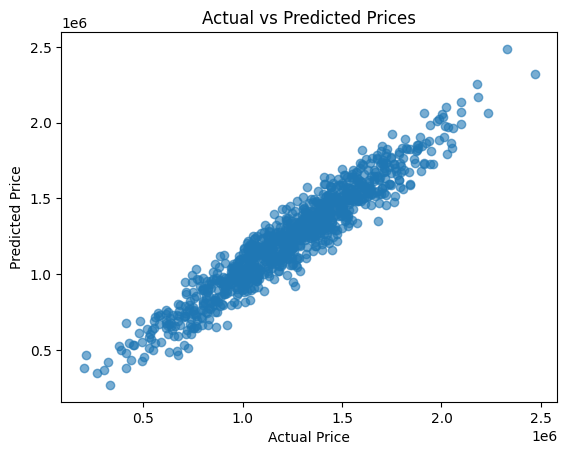

In [16]:

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()
